In [2]:
from sympy import *
init_printing()

## Data loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

DATA_PATH = '/Users/nicolaigarderhansen/Desktop/Bachelorprojekt/Forecasting-water-inflow/Data loading and handling/Cleaned data etc./data_cleaned_and_interpolated.csv'

# Adjust these column names as needed.
date_col = 'time'
target_col = 'KarupBro'
# List of meteorological features from DMI – update if needed.
input_cols = [
    'temp_min_daily', 'temp_max_daily', 'temp_mean_daily', 
    'temp_grass_mean_daily', 'temp_soil_min_daily', 'temp_soil_max_daily', 
    'temp_soil_mean_daily', 'humidity_daily', 'wind_direction_daily', 
    'wind_speed_daily', 'wind_gust_max_daily', 'precip_total_daily', 
    'precip_duration_daily', 'radiation_global_daily', 
    'sunshine_duration_daily'
]


# Read the CSV
df = pd.read_csv(DATA_PATH, parse_dates=[date_col])
df.sort_values(date_col, inplace=True)
df.reset_index(drop=True, inplace=True)

# Optional: Set the date column as index (if needed)
df.set_index(date_col, inplace=True)

df.tail()

,temp_min_daily,temp_max_daily,temp_mean_daily,temp_grass_mean_daily,temp_soil_min_daily,temp_soil_max_daily,temp_soil_mean_daily,humidity_daily,wind_direction_daily,wind_gust_max_daily,wind_speed_daily,precip_total_daily,precip_duration_daily,radiation_global_daily,sunshine_duration_daily,KarupBro
time,,,,,,,,,,,,,,,,
2023-12-20,0.8,4.4,3.141667,2.316667,5.1,5.4,5.241667,88.583333,252.000000,12.2,2.541667,0.4,4.0,349.0,111.0,4448.18
2023-12-21,1.4,8.7,5.316667,4.637500,5.0,5.3,5.141667,86.083333,254.666667,22.5,5.329167,19.9,159.0,270.0,29.5,5602.14
2023-12-22,0.1,4.0,2.395833,1.129167,4.0,5.1,4.533333,66.000000,293.416667,19.1,5.020833,0.6,3.0,749.0,294.5,6636.60
2023-12-23,-1.6,3.3,0.833333,-0.250000,3.6,4.1,3.754167,88.000000,264.000000,10.5,2.379167,0.8,4.0,589.0,247.0,5809.15
2023-12-24,-0.3,2.1,1.120000,0.700000,3.4,3.6,3.520000,97.700000,136.500000,6.6,1.500000,5.0,38.0,9.0,0.0,5197.78


In [4]:
# Replace outliers with NaN
df.loc[df["temp_mean_daily"] > 35, "temp_mean_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["temp_mean_daily"] = df["temp_mean_daily"].ffill()

# Replace outliers with NaN
df.loc[df["precip_total_daily"] > 100, "precip_total_daily"] = np.nan

# Forward-fill (ffill) the missing values
df["precip_total_daily"] = df["precip_total_daily"].ffill()

## Zoom på ekstreme hændelser

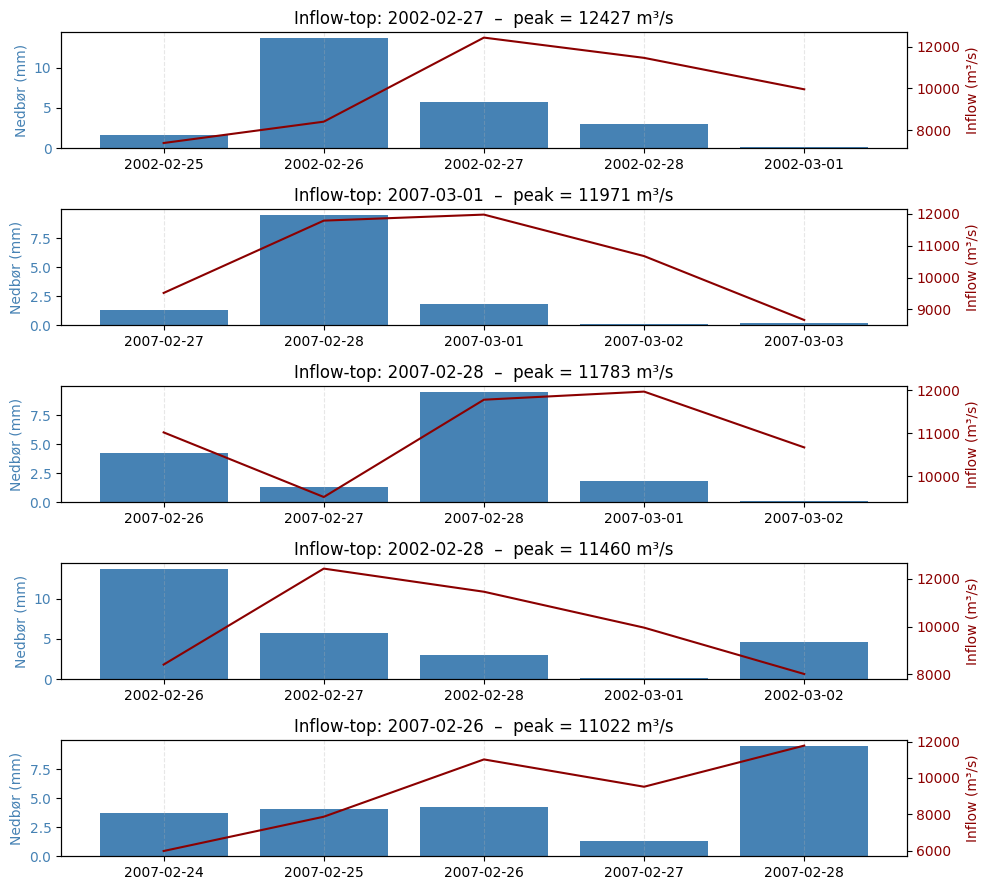

In [ ]:
"""
Plotter tre zoom‑vinduer omkring de 3 største inflow‑toppe:

- Finder de tre højeste værdier i kolonnen 'KarupBro'
- For hver top vises et 5‑døgns vindue (±2 dage) med:
    • Nedbør (søjler)  – venstre akse
    • Inflow  (linje)   – højre akse
"""

import pandas as pd
import matplotlib.pyplot as plt

# Antag at df (med datetime‑index) allerede findes i hukommelsen.
# Hvis ikke, indlæs som i din tidligere kode:
# df = pd.read_csv(..., parse_dates=['time']).set_index('time')

def plot_top3_inflow_windows(data: pd.DataFrame,
                             target='KarupBro',
                             precip='precip_total_daily',
                             days_before=2,
                             days_after=2):
    """Tegn 3 zoom‑plots omkring de største inflow‑toppe."""
    # 1) find top 3 datoer (højeste inflow)
    tops = data[target].nlargest(5)
    fig, axes = plt.subplots(5, 1, figsize=(10, 9), sharex=False)

    for ax, (peak_time, peak_val) in zip(axes, tops.items()):
        win = data.loc[peak_time - pd.Timedelta(days=days_before):
                       peak_time + pd.Timedelta(days=days_after)]

        # Nedbør som søjler
        ax.bar(win.index, win[precip], color='steelblue', label='Nedbør (mm)')
        ax.set_ylabel("Nedbør (mm)", color='steelblue')
        ax.tick_params(axis='y', labelcolor='steelblue')

        # Inflow linje
        ax2 = ax.twinx()
        ax2.plot(win.index, win[target], color='darkred', label='Inflow (m³/s)')
        ax2.set_ylabel("Inflow (m³/s)", color='darkred')
        ax2.tick_params(axis='y', labelcolor='darkred')

        ax.set_title(f"Inflow‑top: {peak_time.date()}  –  peak = {peak_val:.0f} m³/s")
        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


# Kør funktionen
plot_top3_inflow_windows(df)

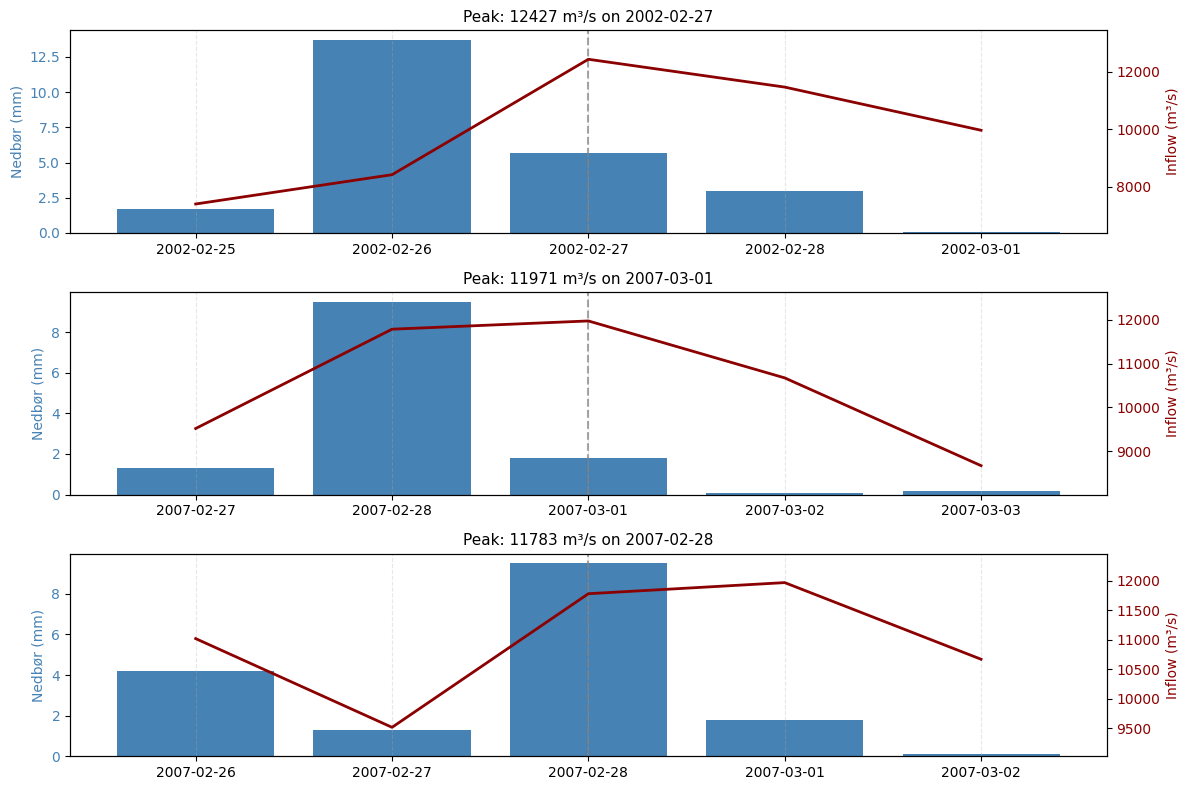

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_top3_inflow_windows(data: pd.DataFrame,
                             target='KarupBro',
                             precip='precip_total_daily',
                             days_before=2,
                             days_after=2,
                             top_n=3):
    """Tegn zoom-plots omkring de største inflow-toppe."""
    # 1) find top N datoer (højeste inflow)
    tops = data[target].nlargest(top_n)

    fig, axes = plt.subplots(top_n, 1, figsize=(12, 8), sharex=False)

    for ax, (peak_time, peak_val) in zip(axes, tops.items()):
        win = data.loc[peak_time - pd.Timedelta(days=days_before):
                       peak_time + pd.Timedelta(days=days_after)]

        # Nedbør som søjler (venstre y-akse)
        ax.bar(win.index, win[precip], color='steelblue', label='Nedbør (mm)')
        ax.set_ylabel("Nedbør (mm)", color='steelblue')
        ax.tick_params(axis='y', labelcolor='steelblue')

        # Inflow som linje (højre y-akse)
        ax2 = ax.twinx()
        ax2.plot(win.index, win[target], color='darkred', label='Inflow (m³/s)', linewidth=2)
        ax2.set_ylabel("Inflow (m³/s)", color='darkred')
        ax2.tick_params(axis='y', labelcolor='darkred')

        # Zoom inflow-y-akse tæt omkring peak
        inflow_min = win[target].min()
        inflow_max = win[target].max()
        buffer = (inflow_max - inflow_min) * 0.2
        ax2.set_ylim(inflow_min - buffer, inflow_max + buffer)

        # Fremhæv peak-dato
        ax.axvline(peak_time, color='grey', linestyle='--', alpha=0.7)

        # Titel
        ax.set_title(f"Peak: {peak_val:.0f} m³/s on {peak_time.date()}", fontsize=11)

        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()

# Kør funktionen
plot_top3_inflow_windows(df)

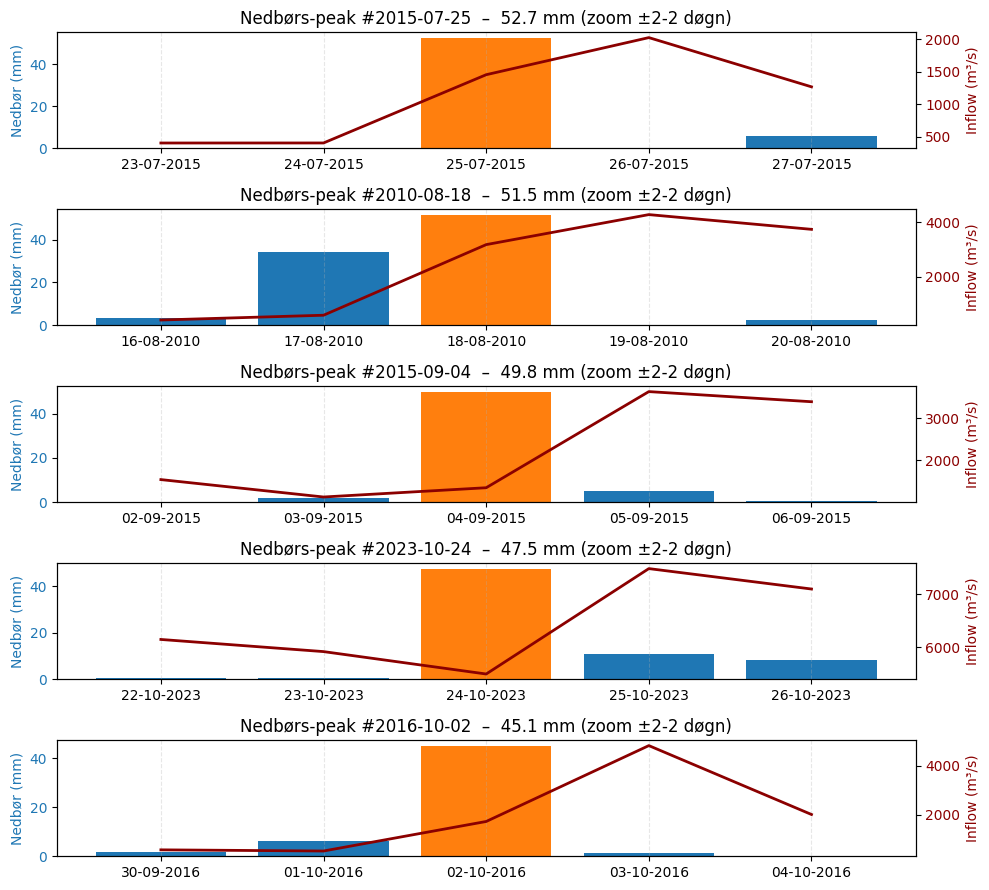

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter


def plot_top3_precip_windows(df,
                             precip_col="precip_total_daily",
                             inflow_col="KarupBro",
                             days_before=2,
                             days_after=2):
    """
    Tegner tre zoom‑plots omkring de kraftigste nedbørs‑dage.
    df           : DataFrame med datetime‑index
    precip_col   : kolonnenavn for nedbør
    inflow_col   : kolonnenavn for inflow
    days_before  : antal døgn før peak, der vises
    days_after   : antal døgn efter peak, der vises
    """

    # 1) Find de tre største nedbørsdage
    top_rain = df[precip_col].dropna().nlargest(5)

    fig, axes = plt.subplots(5, 1, figsize=(10, 9), sharex=False)

    for ax, (peak_ts, peak_val) in zip(axes, top_rain.items()):
        # 2) Klip vindue omkring peak‑dato
        win = df.loc[peak_ts - pd.Timedelta(days=days_before):
                     peak_ts + pd.Timedelta(days=days_after)]

        # Nedbør (venstre akse) – marker selve peak‑dagen i en kontrastfarve
        colors = ["tab:blue" if t != peak_ts else "tab:orange" for t in win.index]
        ax.bar(win.index, win[precip_col], color=colors, width=0.8)
        ax.set_ylabel("Nedbør (mm)", color="tab:blue")
        ax.tick_params(axis='y', labelcolor="tab:blue")

        # Inflow (højre akse) – typisk reaktion på regn
        ax2 = ax.twinx()
        ax2.plot(win.index, win[inflow_col],
                 color="darkred", linewidth=2)
        ax2.set_ylabel("Inflow (m³/s)", color="darkred")
        ax2.tick_params(axis='y', labelcolor="darkred")

        # Titel + pynt
        ax.set_title(
            f"Nedbørs‑peak #{peak_ts.date()}  –  {peak_val:.1f} mm (zoom ±{days_before}-{days_after} døgn)")
        ax.xaxis.set_major_formatter(DateFormatter("%d‑%m‑%Y"))
        ax.grid(True, axis='x', linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.show()


# -----  Kør funktionen  -----
plot_top3_precip_windows(df)

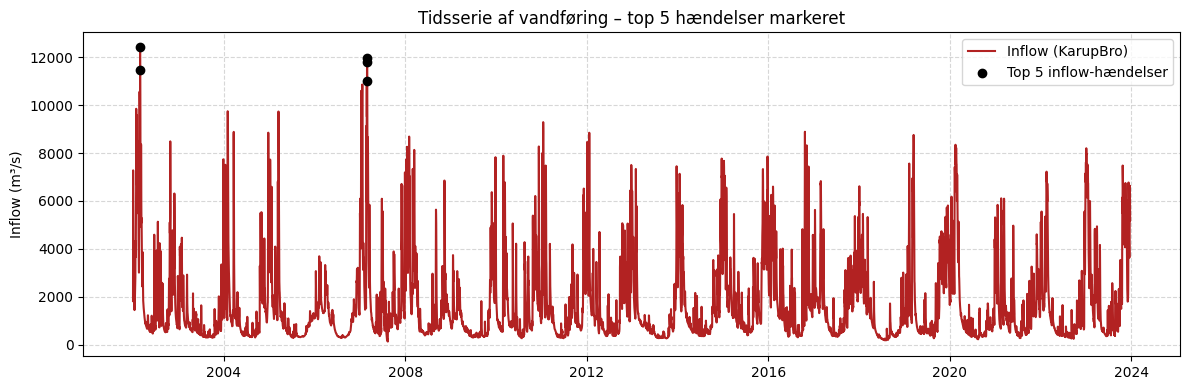

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sortér og find de 5 højeste inflows
top5 = df['KarupBro'].nlargest(5)

# Plot hele serien med markeringer
plt.figure(figsize=(12, 4))
plt.plot(df.index, df['KarupBro'], label='Inflow (KarupBro)', color='firebrick')
plt.scatter(top5.index, top5.values, color='black', zorder=5, label='Top 5 inflow-hændelser')
plt.title("Tidsserie af vandføring – top 5 hændelser markeret")
plt.ylabel("Inflow (m³/s)")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

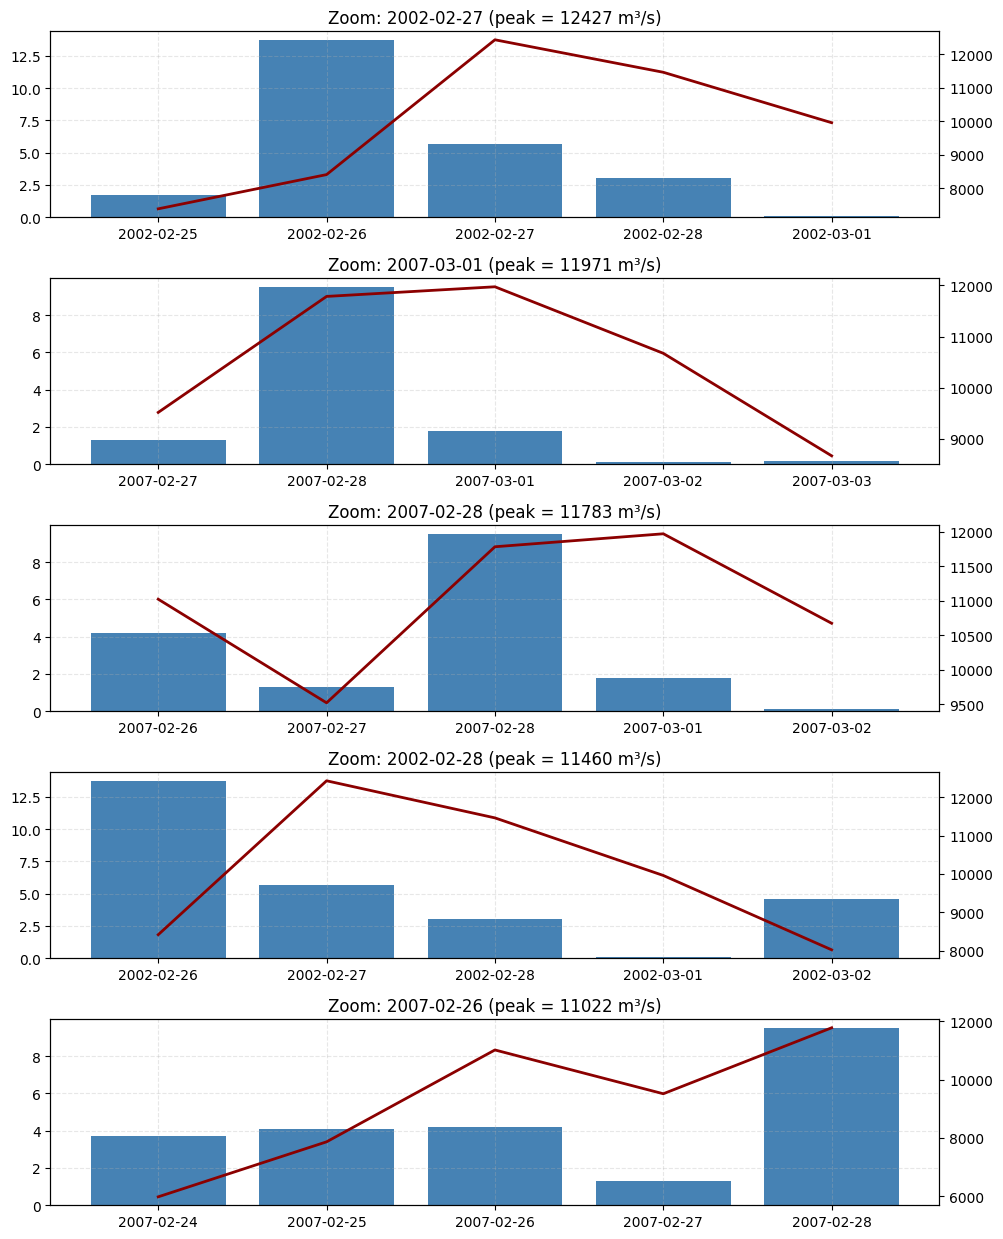

In [8]:
def plot_zoom_on_peaks(df, peaks, window=2):
    fig, axes = plt.subplots(len(peaks), 1, figsize=(10, 2.5*len(peaks)))
    for i, (ts, val) in enumerate(peaks.items()):
        ax = axes[i] if len(peaks) > 1 else axes
        win = df.loc[ts - pd.Timedelta(days=window): ts + pd.Timedelta(days=window)]
        ax.bar(win.index, win['precip_total_daily'], color='steelblue', label='Nedbør')
        ax2 = ax.twinx()
        ax2.plot(win.index, win['KarupBro'], color='darkred', lw=2, label='Inflow')
        ax.set_title(f"Zoom: {ts.date()} (peak = {val:.0f} m³/s)")
        ax.grid(True, linestyle='--', alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_zoom_on_peaks(df, top5)

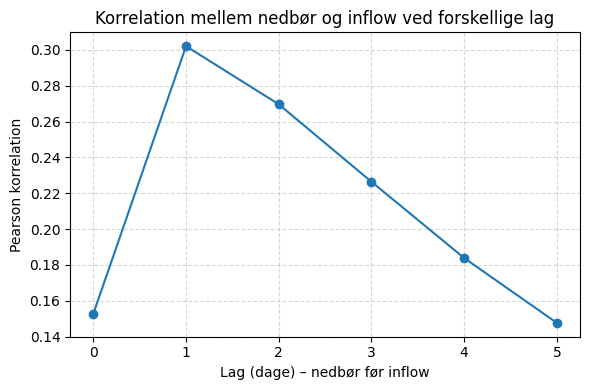

In [9]:
import numpy as np

max_lag = 5
cors = [df['precip_total_daily'].corr(df['KarupBro'].shift(-k)) for k in range(max_lag+1)]

plt.figure(figsize=(6, 4))
plt.plot(range(max_lag+1), cors, marker='o')
plt.xticks(range(max_lag+1))
plt.title("Korrelation mellem nedbør og inflow ved forskellige lag")
plt.xlabel("Lag (dage) – nedbør før inflow")
plt.ylabel("Pearson korrelation")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


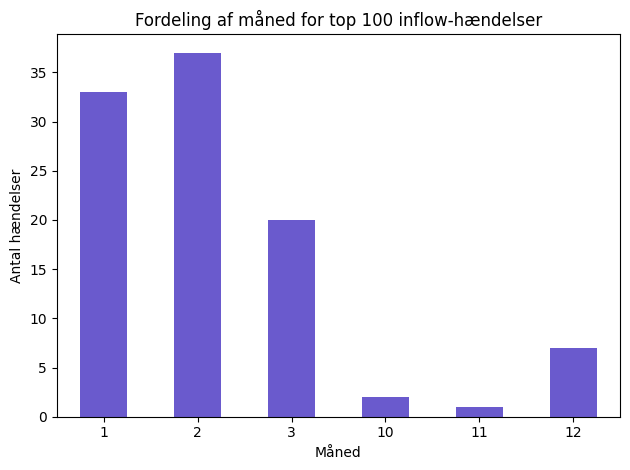

In [10]:
topN = df['KarupBro'].nlargest(100)
topN_months = topN.index.month

topN_months.value_counts().sort_index().plot(kind='bar', color='slateblue')
plt.title("Fordeling af måned for top 100 inflow-hændelser")
plt.xlabel("Måned")
plt.ylabel("Antal hændelser")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

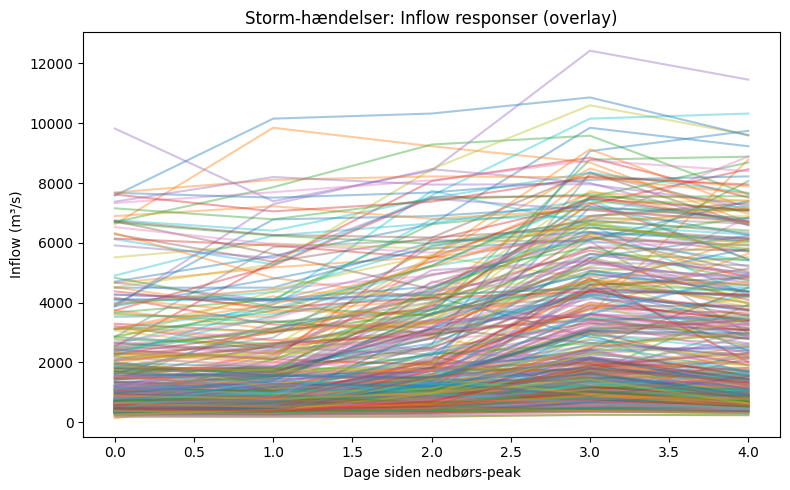

In [11]:
def extract_windows(data, p_thresh, pad=2):
    mask = data['precip_total_daily'] > p_thresh
    storms = []
    for i in range(len(mask)):
        if mask.iloc[i]:
            t = mask.index[i]
            win = data.loc[t - pd.Timedelta(days=pad): t + pd.Timedelta(days=pad)]
            storms.append(win)
    return storms

# Ekstreme nedbørshændelser
q_p = df['precip_total_daily'].quantile(0.95)
storms = extract_windows(df, q_p)

# Plot overlay
plt.figure(figsize=(8, 5))
for s in storms:
    rel_days = (s.index - s.index[0]).days
    plt.plot(rel_days, s['KarupBro'], alpha=0.4)
plt.title("Storm-hændelser: Inflow responser (overlay)")
plt.xlabel("Dage siden nedbørs-peak")
plt.ylabel("Inflow (m³/s)")
plt.tight_layout()
plt.show()

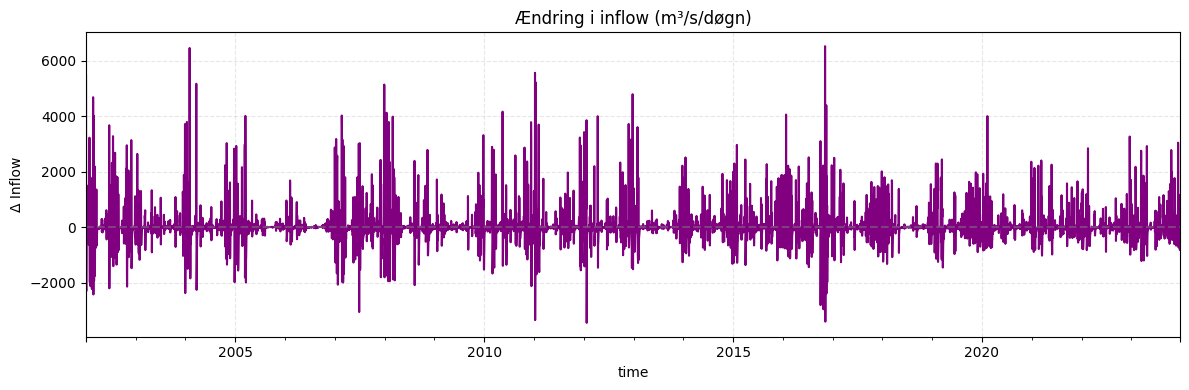

In [12]:
df['inflow_diff'] = df['KarupBro'].diff()

plt.figure(figsize=(12, 4))
df['inflow_diff'].plot(color='purple')
plt.axhline(0, linestyle='--', color='gray', alpha=0.5)
plt.title("Ændring i inflow (m³/s/døgn)")
plt.ylabel("Δ Inflow")
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

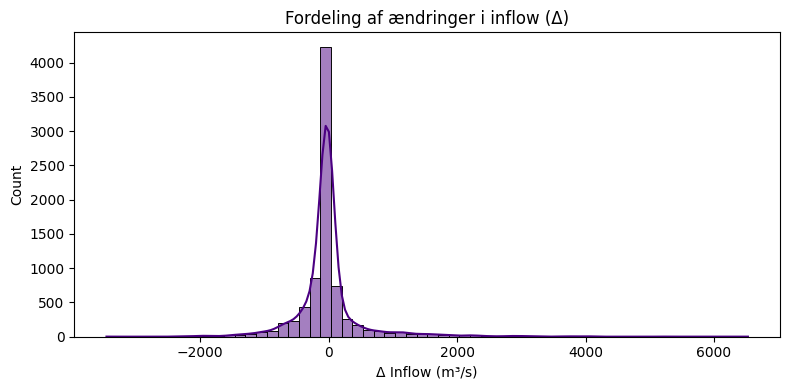

In [13]:
import seaborn as sns

plt.figure(figsize=(8,4))
sns.histplot(df['inflow_diff'].dropna(), bins=60, kde=True, color='indigo')
plt.title("Fordeling af ændringer i inflow (Δ)")
plt.xlabel("Δ Inflow (m³/s)")
plt.tight_layout()
plt.show()

In [17]:
top_rise = df['inflow_diff'].nlargest(5)

print("🔼 Kraftigste stigninger:\n", top_rise)

🔼 Kraftigste stigninger:
 time
2016-11-06    6527.78
2004-02-01    6462.23
2011-01-09    5564.82
2002-01-02    5449.71
2011-01-14    5218.24
Name: inflow_diff, dtype: float64


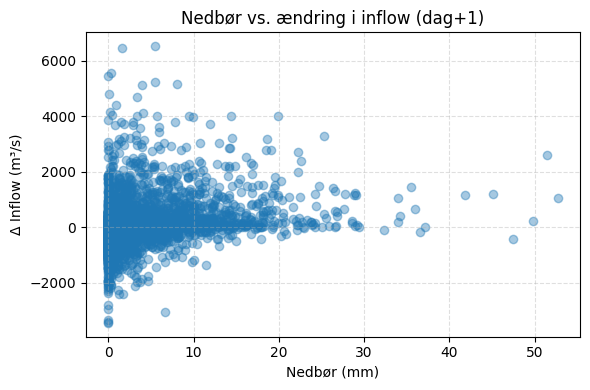

In [15]:
plt.figure(figsize=(6,4))
plt.scatter(df['precip_total_daily'], df['inflow_diff'], alpha=0.4)
plt.xlabel("Nedbør (mm)")
plt.ylabel("Δ Inflow (m³/s)")
plt.title("Nedbør vs. ændring i inflow (dag+1)")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

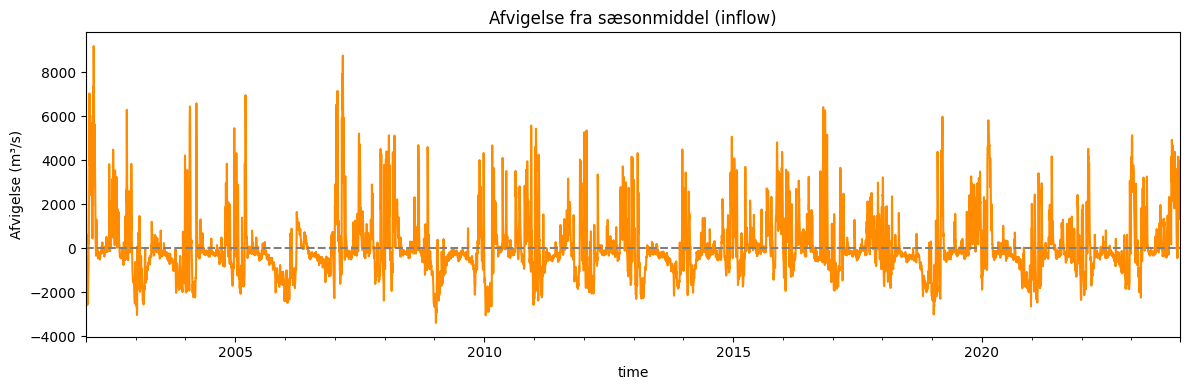

In [16]:
# Forventet inflow pr. dag på året (DOY)
seasonal_mean = df.groupby(df.index.dayofyear)['KarupBro'].mean()
df['dayofyear'] = df.index.dayofyear
df['inflow_vs_season'] = df['KarupBro'] - df['dayofyear'].map(seasonal_mean)

# Plot
plt.figure(figsize=(12,4))
df['inflow_vs_season'].plot(color='darkorange')
plt.axhline(0, ls='--', color='gray')
plt.title("Afvigelse fra sæsonmiddel (inflow)")
plt.ylabel("Afvigelse (m³/s)")
plt.tight_layout()
plt.show()